In [1]:
!pip install qutip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 43.8 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from scipy import constants
import math as m
from qutip import superoperator

%matplotlib inline

In [ ]:
def lindblad_dephasing(c):
    cdc = c.dag()*c
    return spre(cdc) * spost(cdc) - 0.5 * spre(cdc) - 0.5 * spost(cdc)

In [ ]:
N = 10            # Número de qubits
b = 0.1        # Multiplicador J
alpha = 0       # Hoppping range
i= 6            # i-1 site

h = constants.hbar

### Estado inicial
# Todos los spins en estado |0>
psi_list = []

for n in range(N):
    psi_list.append(basis(2,0))
    
# Spin 3 en estado |1>
psi_list[2] = basis(2,1)
psi0 = tensor(psi_list)


# Tiempo de evolución
tlist = np.linspace(0, 300, 1000)

In [ ]:
# Construimos los operadores
si = qeye(2)
sm = sigmam()
sp = sigmap()

sm_list = []
sp_list = []

for n in range(N):
    op_list = []
    for m in range(N):
        op_list.append(si)

    op_list[n] = sm
    sm_list.append(tensor(op_list))

    op_list[n] = sp
    sp_list.append(tensor(op_list))
    
# Coupling strengths with the aproximation
J = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if i != j:
            J[i,j]=(abs(i-j))**(-alpha)

J_max = J.max()

# construct the hamiltonian
H_j = 0

for i in range(N):
    for j in range(N):
        if (i<j):
            H_j += J[i,j] * sp_list[i] * sm_list[j]
            H_j += (J[i,j] * sp_list[i] * sm_list[j]).dag()
            
L0 = superoperator.liouvillian(H_j)

L_deph = 0

for i in range(N):
    L_deph += b*lindblad_dephasing(sm_list[i])

L_diss = lindblad_dissipator(sm_list[6])
    
L = L0 + L_diss + L_deph

In [ ]:
result = mesolve(L, psi0, tlist, [], [])

In [ ]:
states = [s * s.dag() for s in result.states]

In [ ]:
sm_sp = []

for i in range(N):
    sm_sp.append(sm_list[i]*sp_list[i])

exp_sz = np.array(expect(states, sm_sp ))

alpha=0, gamma=*0.1*

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

for i in range(10):
  ax.plot(list(tlist),exp_sz[:,i] , label=i)

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Absortion Probability')
ax.set_title(f"gamma={b}*J_max and alpha={alpha}")

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist),exp_sz[:,6] , label="7")

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Absortion Probability')
ax.set_title(f"gamma={b}*J_max and alpha={alpha}")

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(10):
  if i != 2:
    ax.plot(list(tlist),exp_sz[:,i] , label=i)

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Absortion Probability')
ax.set_title(f"gamma={b}*J_max and alpha={alpha}")

alpha=0, gamma=0.1

Text(0.5, 1.0, 'gamma=0.1*J_max and alpha=0')

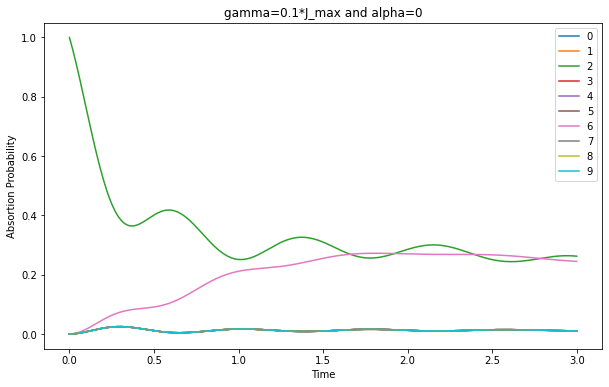

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

for i in range(10):
  ax.plot(list(tlist),exp_sz[:,i] , label=i)

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Absortion Probability')
ax.set_title(f"gamma={b}*J_max and alpha={alpha}")

Text(0.5, 1.0, 'gamma=0.1*J_max and alpha=0')

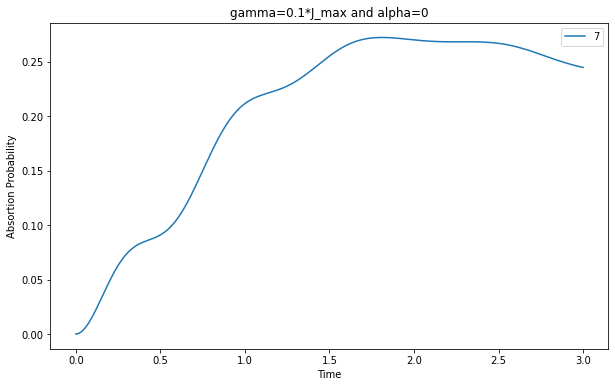

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist),exp_sz[:,6] , label="7")

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Absortion Probability')
ax.set_title(f"gamma={b}*J_max and alpha={alpha}")

Text(0.5, 1.0, 'gamma=0.1*J_max and alpha=0')

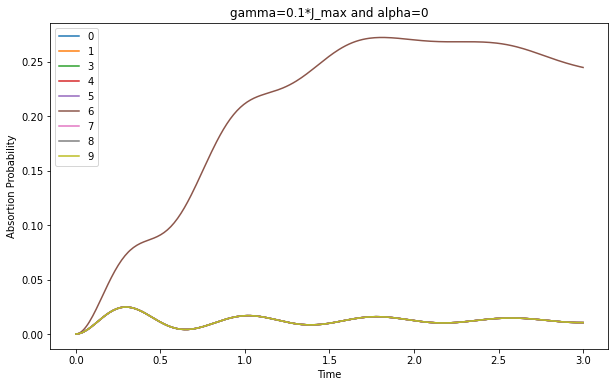

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(10):
  if i != 2:
    ax.plot(list(tlist),exp_sz[:,i] , label=i)

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Absortion Probability')
ax.set_title(f"gamma={b}*J_max and alpha={alpha}")

alpha = 1, sin desfase



Text(0.5, 1.0, '\\gamma = 0.1 J_max')

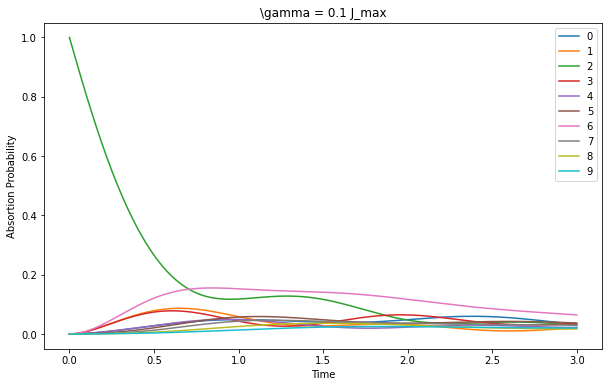

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

for i in range(10):
  ax.plot(list(tlist),exp_sz[:,i] , label=i)

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Absortion Probability')
ax.set_title(r'\gamma = 0.1 J_max')

Text(0.5, 1.0, '\\gamma = 0.1 J_max')

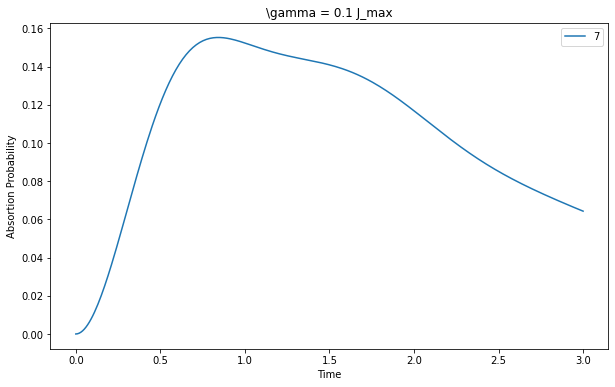

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist),exp_sz[:,6] , label="7")

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Absortion Probability')
ax.set_title(r'\gamma = 0.1 J_max')

Text(0.5, 1.0, '\\gamma = 0.1 J_max')

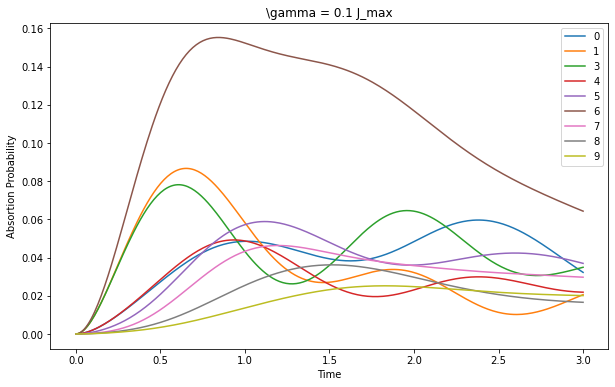

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(10):
  if i != 2:
    ax.plot(list(tlist),exp_sz[:,i] , label=i)

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Absortion Probability')
ax.set_title(r'\gamma = 0.1 J_max')

alpha = -1, sin desfase

Text(0.5, 1.0, '\\gamma = 0.1 J_max')

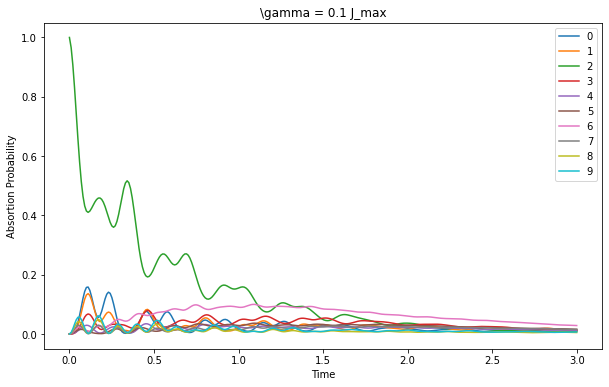

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

for i in range(10):
  ax.plot(list(tlist),exp_sz[:,i] , label=i)

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Absortion Probability')
ax.set_title(r'\gamma = 0.1 J_max')

Text(0.5, 1.0, '\\gamma = 0.1 J_max')

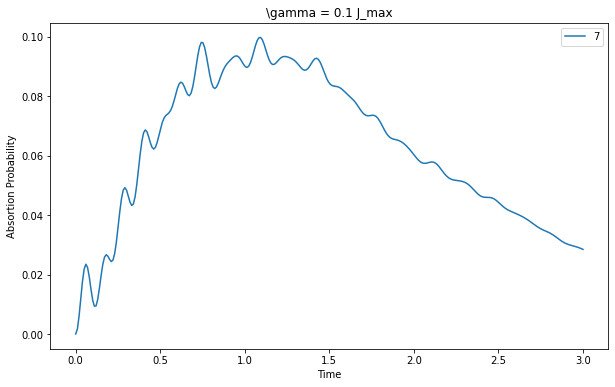

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist),exp_sz[:,6] , label="7")

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Absortion Probability')
ax.set_title(r'\gamma = 0.1 J_max')

Text(0.5, 1.0, '\\gamma = 0.1 J_max')

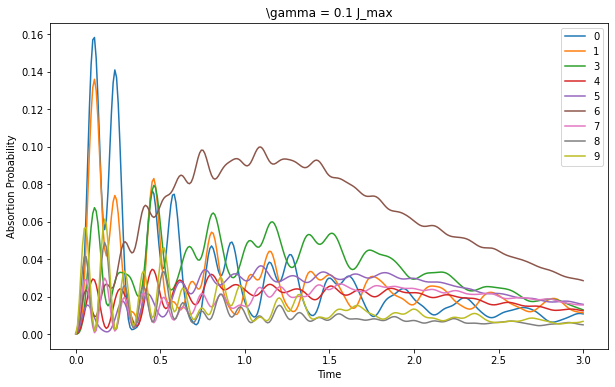

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(10):
  if i != 2:
    ax.plot(list(tlist),exp_sz[:,i] , label=i)

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Absortion Probability')
ax.set_title(r'\gamma = 0.1 J_max')